In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
import numpy as np
import requests
import io
from PIL import Image
import time

In [3]:
def plot_image(img):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(img);

In [4]:
url = 'http://localhost:8000'

In [5]:
# image_path = 'api-use/source.png'
image_path = '/home/intsco/Downloads/AM_cropped_Rho.png'

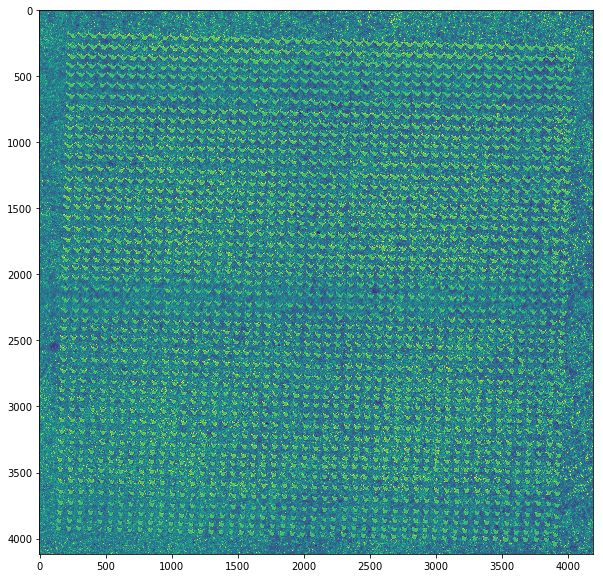

In [6]:
img = np.array(Image.open(io.open(image_path, 'rb')))
plot_image(img)

In [7]:
img.shape

(4116, 4190)

In [55]:
resp = requests.post(url + '/tasks', data=io.open(image_path, 'rb'), headers={'Content-Type': 'image/png'})

In [56]:
task_uri = resp.headers['location']
task_id = task_uri.split('/')[-1]
task_id

'd83053d7-bef4-46fd-a1ba-c54961d25a48'

In [84]:
while True:
    resp = requests.get(url + task_uri)
    if resp.json().get('status', None) == 'FINISHED':
        break
    else:
        print('.', end='')
        time.sleep(1)
resp.json()

{'status': 'FINISHED'}

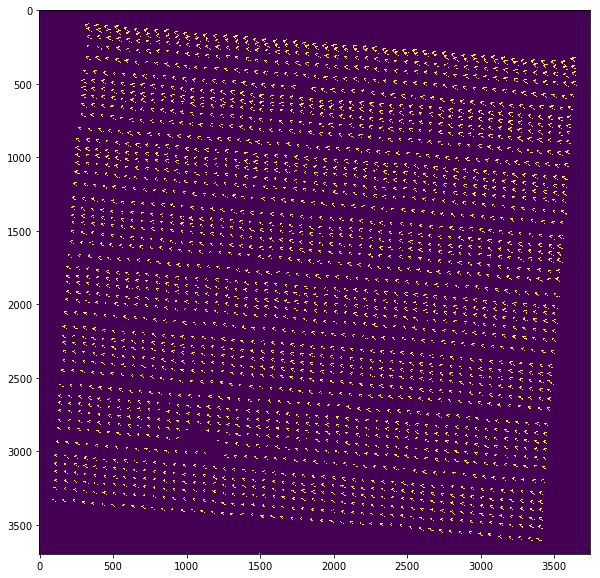

In [93]:
resp = requests.get(f'{url}/masks/{task_id}')
mask = np.array(Image.open(io.BytesIO(resp.content)))
plot_image(mask)